In [1]:
import os
import codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('3-dropout-ratio-2012-2015.csv')
# Reading the file.

In [3]:
df.head()
#this dataset covers about the droup out rates at various grades all across the country.
#a gender based division is also done to get some insights.

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [4]:
df.tail()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,NR,NR,NR
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54
109,All India,2014-15,4.36,3.88,4.13,3.49,4.6,4.03,17.21,16.88,17.06,0.25,NR,NR


In [5]:
df.shape

(110, 14)

In [6]:
df.info()
# Info tells about how many null and non-null values are there in the dataset and what are dtypes of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             110 non-null    object
 1   year                 110 non-null    object
 2   Primary_Boys         110 non-null    object
 3   Primary_Girls        110 non-null    object
 4   Primary_Total        110 non-null    object
 5   Upper Primary_Boys   110 non-null    object
 6   Upper Primary_Girls  110 non-null    object
 7   Upper Primary_Total  110 non-null    object
 8   Secondary _Boys      110 non-null    object
 9   Secondary _Girls     110 non-null    object
 10  Secondary _Total     110 non-null    object
 11  HrSecondary_Boys     110 non-null    object
 12  HrSecondary_Girls    110 non-null    object
 13  HrSecondary_Total    110 non-null    object
dtypes: object(14)
memory usage: 12.2+ KB


In [7]:
df.dtypes

State_UT               object
year                   object
Primary_Boys           object
Primary_Girls          object
Primary_Total          object
Upper Primary_Boys     object
Upper Primary_Girls    object
Upper Primary_Total    object
Secondary _Boys        object
Secondary _Girls       object
Secondary _Total       object
HrSecondary_Boys       object
HrSecondary_Girls      object
HrSecondary_Total      object
dtype: object

In [8]:
df.isnull().sum()

State_UT               0
year                   0
Primary_Boys           0
Primary_Girls          0
Primary_Total          0
Upper Primary_Boys     0
Upper Primary_Girls    0
Upper Primary_Total    0
Secondary _Boys        0
Secondary _Girls       0
Secondary _Total       0
HrSecondary_Boys       0
HrSecondary_Girls      0
HrSecondary_Total      0
dtype: int64

In [9]:
df.columns

Index(['State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')

In [10]:
df.describe()
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe


,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110,110,110,110,110,110,110,110,110,110,110,110,110,110
unique,40,3,93,87,87,91,97,96,106,107,106,81,76,78
top,A & N Islands,2013-14,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
freq,3,37,15,15,17,16,8,9,4,4,4,28,34,31


In [11]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [12]:
df.dropna(inplace = True)

In [13]:
df.shape

(110, 14)

In [14]:
df.columns

Index(['State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')

In [15]:
df.columns = df.columns.str.lstrip()
#removed all the unwanted spacing and covered the gaps

In [16]:
df.columns

Index(['State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')

In [17]:
df.describe()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110,110,110,110,110,110,110,110,110,110,110,110,110,110
unique,40,3,93,87,87,91,97,96,106,107,106,81,76,78
top,A & N Islands,2013-14,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
freq,3,37,15,15,17,16,8,9,4,4,4,28,34,31


In [18]:
missing_values=['NR','Uppe_r_Primary']
df=df.replace(missing_values,np.NaN)
df
#replacing all the np values to Nan and also converting the data typer to float

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,NaN,NaN,NaN
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [19]:
df.dtypes

State_UT               object
year                   object
Primary_Boys           object
Primary_Girls          object
Primary_Total          object
Upper Primary_Boys     object
Upper Primary_Girls    object
Upper Primary_Total    object
Secondary _Boys        object
Secondary _Girls       object
Secondary _Total       object
HrSecondary_Boys       object
HrSecondary_Girls      object
HrSecondary_Total      object
dtype: object

In [20]:
df["Primary_Boys"]=df["Primary_Boys"].astype("float64")
m1=round(df["Primary_Boys"].mean(),2)
m1
#finding the mean and replacing the empty blocks in those rows with the mean values

4.97

In [21]:
df["Primary_Boys"].head(20)

0      0.83
1      1.35
2      0.47
3      3.30
4      4.31
5      6.57
6     11.54
7     15.84
8     11.51
9      7.02
10     8.19
11    16.07
12      NaN
13     2.38
14     0.35
15      NaN
16      NaN
17      NaN
18     4.24
19     1.45
Name: Primary_Boys, dtype: float64

In [22]:
df["Primary_Boys"].fillna(m1,inplace=True)
df["Primary_Boys"].head(20)

0      0.83
1      1.35
2      0.47
3      3.30
4      4.31
5      6.57
6     11.54
7     15.84
8     11.51
9      7.02
10     8.19
11    16.07
12     4.97
13     2.38
14     0.35
15     4.97
16     4.97
17     4.97
18     4.24
19     1.45
Name: Primary_Boys, dtype: float64

In [23]:
df["Primary_Girls"]=df["Primary_Girls"].astype("float64")
m2=round(df["Primary_Girls"].mean(),2)
m2

4.64

In [24]:
df["Primary_Girls"].fillna(m2,inplace=True)
df["Primary_Girls"].head(20)

0      0.51
1      1.06
2      0.55
3      3.05
4      4.39
5      6.89
6     10.22
7     14.44
8     10.09
9      5.46
10     6.68
11    14.65
12     4.64
13     1.79
14     4.64
15     4.64
16     4.64
17     4.64
18     4.05
19     1.38
Name: Primary_Girls, dtype: float64

In [25]:
df["Primary_Total"]=df["Primary_Total"].astype("float64")
m3=round(df["Primary_Total"].mean(),2)
m3

4.91

In [26]:
df["Primary_Total"].fillna(m3,inplace=True)
df["Primary_Total"].head(20)

0      0.68
1      1.21
2      0.51
3      3.18
4      4.35
5      6.72
6     10.89
7     15.16
8     10.82
9      6.24
10     7.44
11    15.36
12     4.91
13     2.09
14     4.91
15     4.91
16     4.91
17     4.91
18     4.14
19     1.42
Name: Primary_Total, dtype: float64

In [27]:
df[["Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total","Secondary _Boys","Secondary _Girls","Secondary _Total","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"
]]=df[["Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total","Secondary _Boys","Secondary _Girls","Secondary _Total","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"
]].astype("float64")
df.dtypes
#we converted all of the data type into float 

State_UT                object
year                    object
Primary_Boys           float64
Primary_Girls          float64
Primary_Total          float64
Upper Primary_Boys     float64
Upper Primary_Girls    float64
Upper Primary_Total    float64
Secondary _Boys        float64
Secondary _Girls       float64
Secondary _Total       float64
HrSecondary_Boys       float64
HrSecondary_Girls      float64
HrSecondary_Total      float64
dtype: object

In [28]:
df[["Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total","Secondary _Boys","Secondary _Girls","Secondary _Total","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"
]]=df[["Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total","Secondary _Boys","Secondary _Girls","Secondary _Total","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"
]].fillna(value=df[["Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total","Secondary _Boys","Secondary _Girls","Secondary _Total","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"
]].mean())
df
#we found the mean of all the rows and then replaced the null values with the mean value
#we basically made the whole data into numerical values so that it will be easy while visualization

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,4.236667,1.09,1.23,5.57,5.55,5.56,17.660000,10.150000,14.140000
1,A & N Islands,2013-14,1.35,1.06,1.21,4.236667,1.54,0.51,8.36,5.98,7.20,18.940000,12.200000,15.870000
2,A & N Islands,2014-15,0.47,0.55,0.51,1.440000,1.95,1.69,11.47,8.16,9.87,21.050000,12.210000,16.930000
3,Andhra Pradesh,2012-13,3.30,3.05,3.18,3.210000,3.51,3.36,12.21,13.25,12.72,2.660000,7.206974,0.350000
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.460000,4.12,3.78,11.95,13.37,12.65,12.650000,10.850000,11.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.630000,3.10,4.31,16.73,19.77,18.34,8.030000,7.760000,7.900000
106,West Bengal,2014-15,2.13,0.79,1.47,5.840000,2.88,4.30,16.33,19.06,17.80,8.180000,8.040000,8.110000
107,All India,2012-13,4.68,4.66,4.67,2.300000,4.01,3.13,14.54,14.54,14.54,9.347317,7.206974,8.296329
108,All India,2013-14,4.53,4.14,4.34,3.090000,4.49,3.77,17.93,17.79,17.86,1.480000,1.610000,1.540000


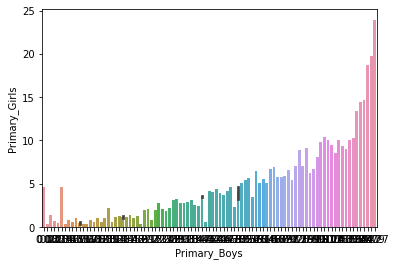

In [29]:
_=sns.barplot(x='Primary_Boys',y='Primary_Girls',data=df)


In [30]:
df[["Primary_Boys","Primary_Girls","Primary_Total","Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total","Secondary _Boys","Secondary _Girls","Secondary _Total","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"
]]=df[["Primary_Boys","Primary_Girls","Primary_Total","Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total","Secondary _Boys","Secondary _Girls","Secondary _Total","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"
]].astype("float64").astype(int)
df.dtypes
#converting the float values to numeric for making graphs 

State_UT               object
year                   object
Primary_Boys            int32
Primary_Girls           int32
Primary_Total           int32
Upper Primary_Boys      int32
Upper Primary_Girls     int32
Upper Primary_Total     int32
Secondary _Boys         int32
Secondary _Girls        int32
Secondary _Total        int32
HrSecondary_Boys        int32
HrSecondary_Girls       int32
HrSecondary_Total       int32
dtype: object

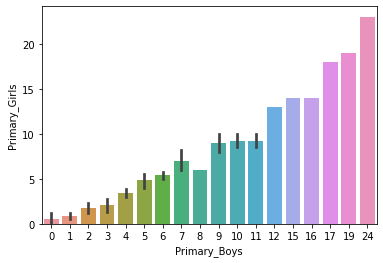

In [31]:
_=sns.barplot(x='Primary_Boys',y='Primary_Girls',data=df)

In [32]:
df.shape

(110, 14)

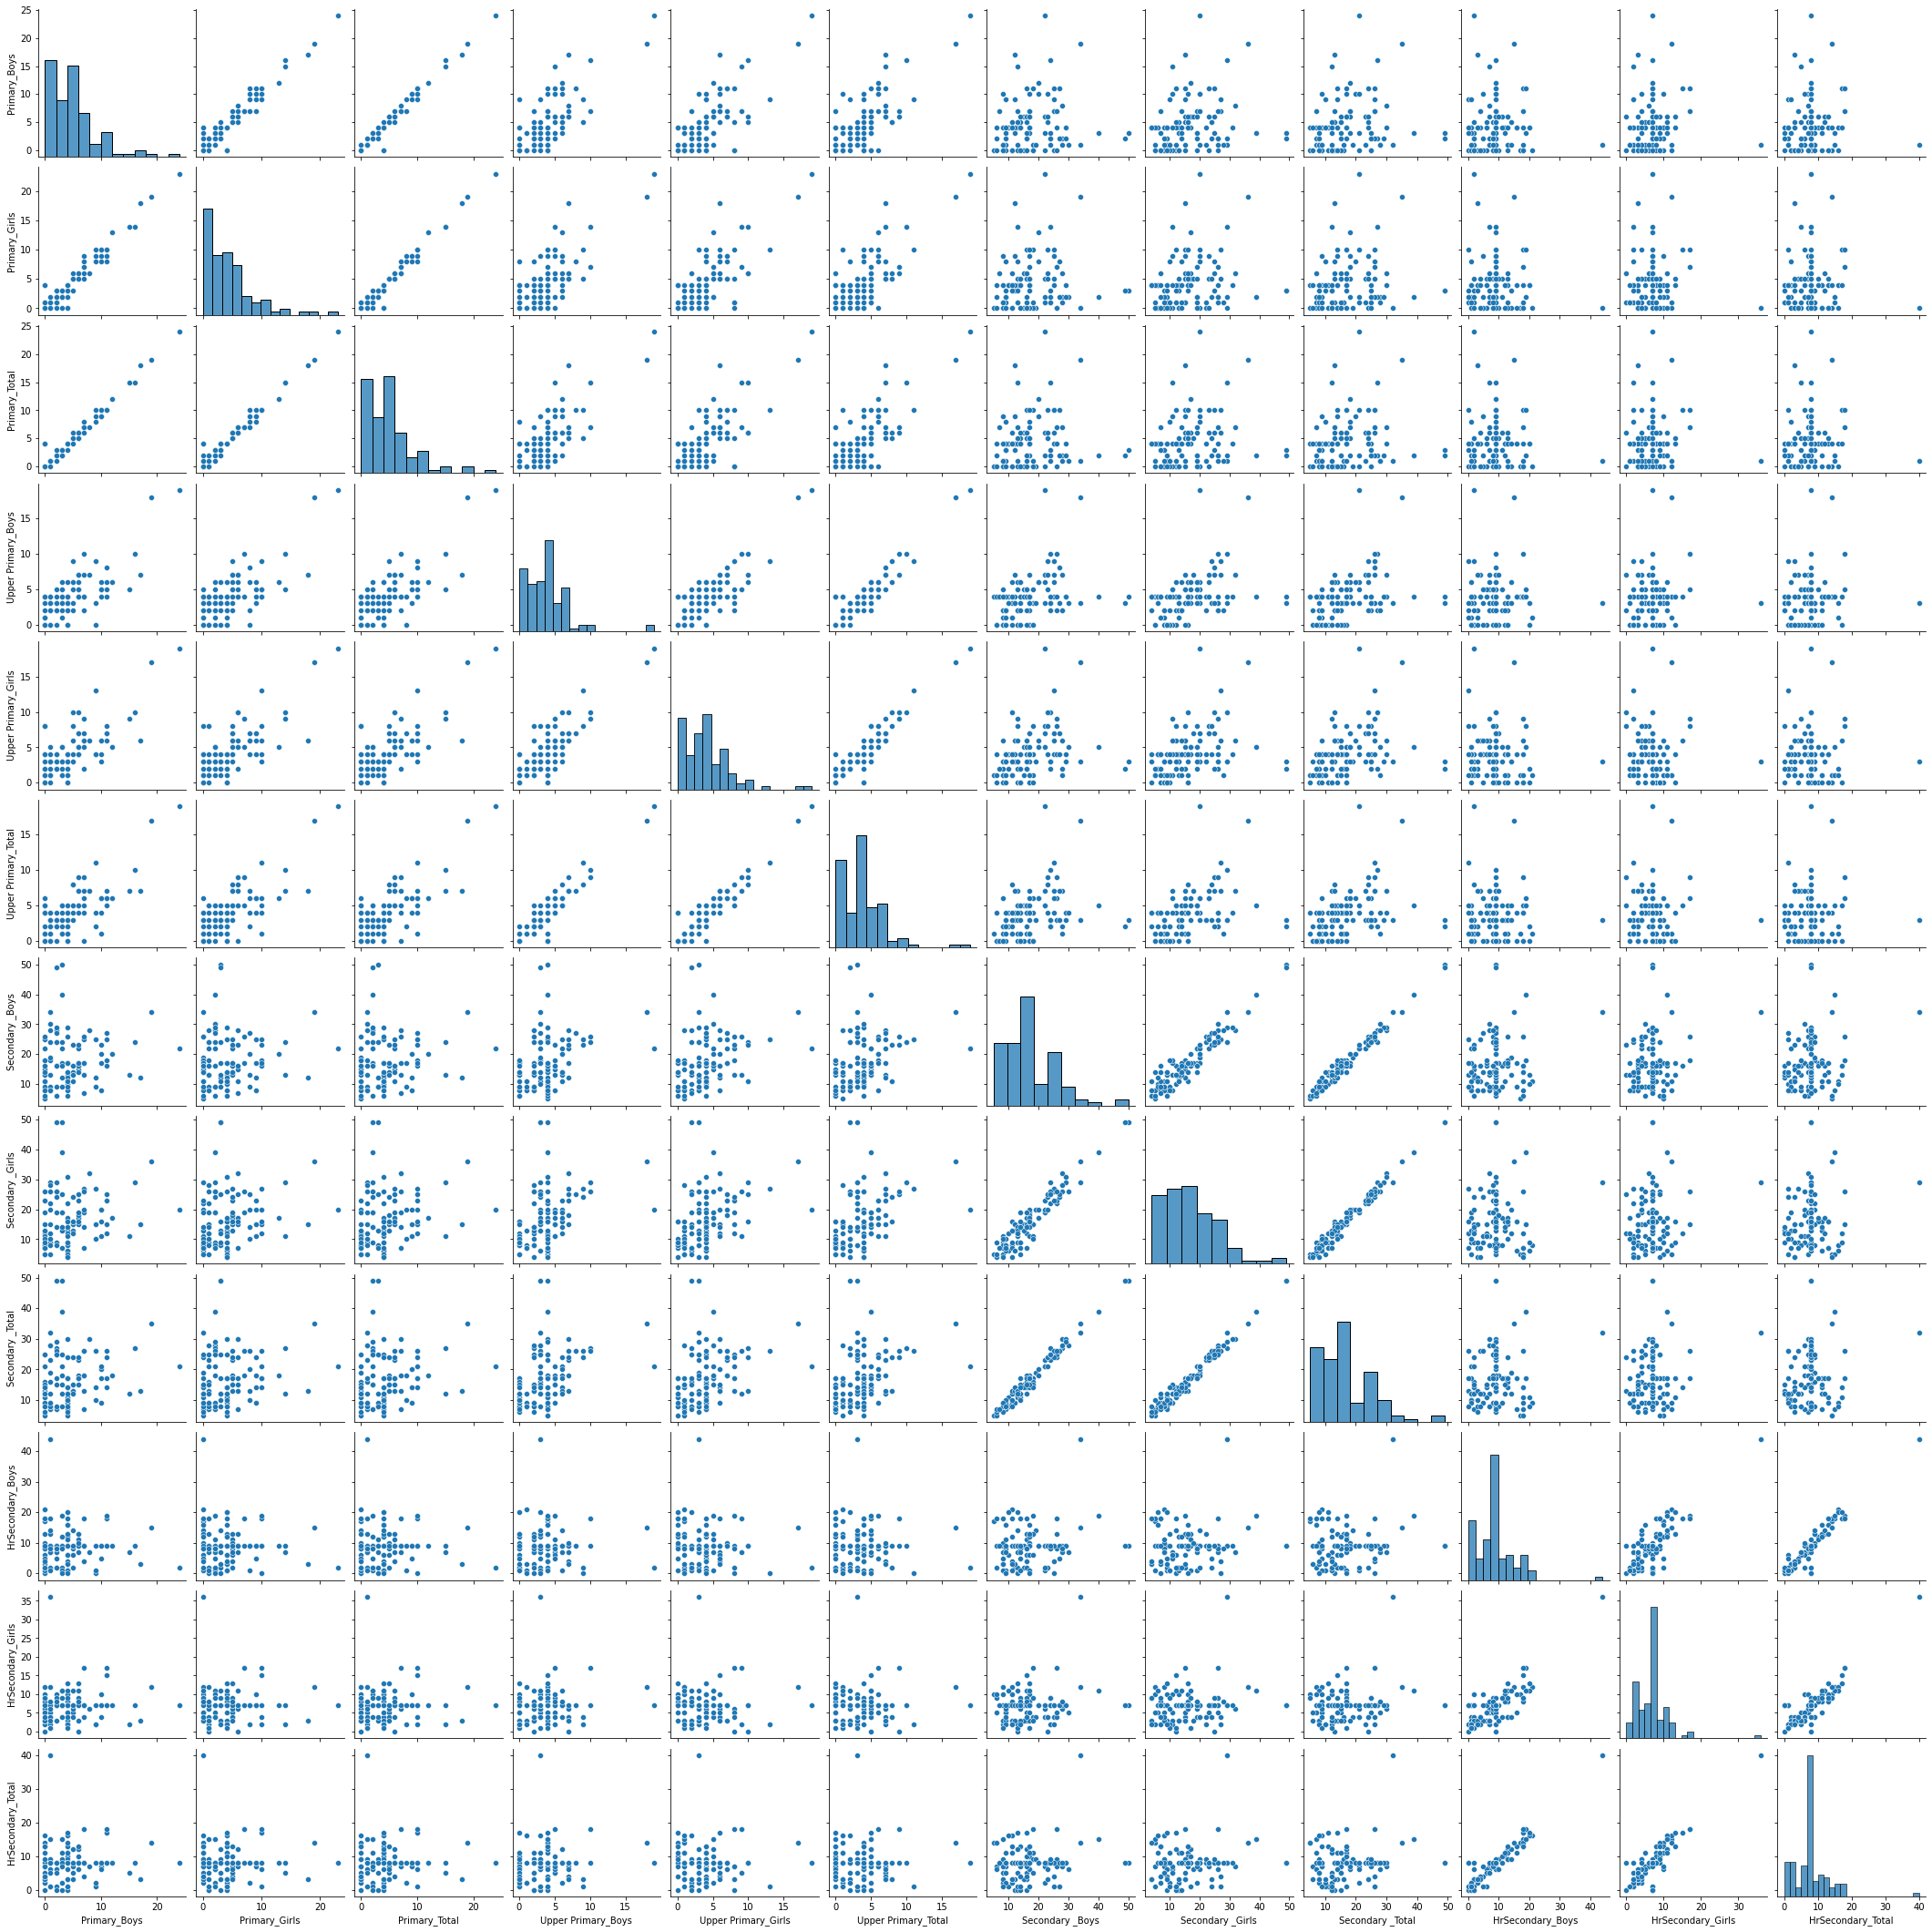

In [33]:
sns.pairplot(df)
#it is the analysis of all the rows with respect to thier collums and thier effects on each other.

In [35]:
import altair as alt

In [40]:
df.iloc[0:3]
#this is a function to see individual state data

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0,0,0,4,1,1,5,5,5,17,10,14
1,A & N Islands,2013-14,1,1,1,4,1,0,8,5,7,18,12,15
2,A & N Islands,2014-15,0,0,0,1,1,1,11,8,9,21,12,16


<AxesSubplot:xlabel='year', ylabel='Upper Primary_Total'>

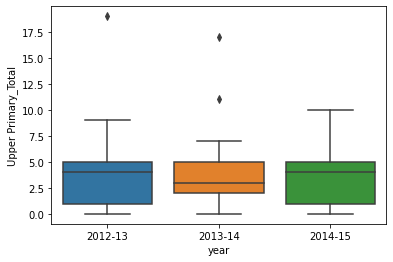

In [41]:
sns.boxplot(x='year',y='Upper Primary_Total', data=df)
#this represents year wise data with respect to each school level
#here, the median value for all three years falls between 2.5-5

<AxesSubplot:xlabel='year', ylabel='Primary_Total'>

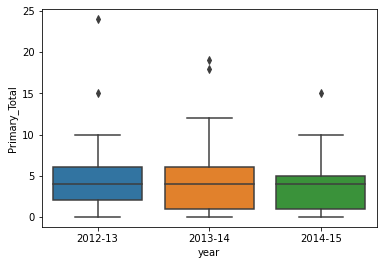

In [42]:
sns.boxplot(x='year',y='Primary_Total',data=df)

<AxesSubplot:xlabel='year', ylabel='Secondary _Total'>

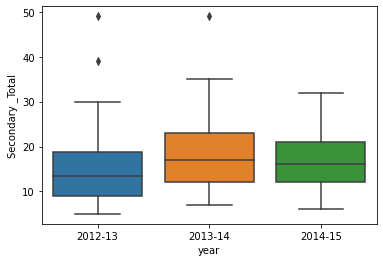

In [44]:
sns.boxplot(x='year',y='Secondary _Total',data=df)

In [47]:
alt.Chart(df).mark_circle().encode(
x='Primary_Boys:Q',
y='Primary_Total:Q',
color='State_UT:N',
).interactive()
x=df
#there is a positive co-relation between the two

<AxesSubplot:xlabel='State_UT', ylabel='Primary_Total'>

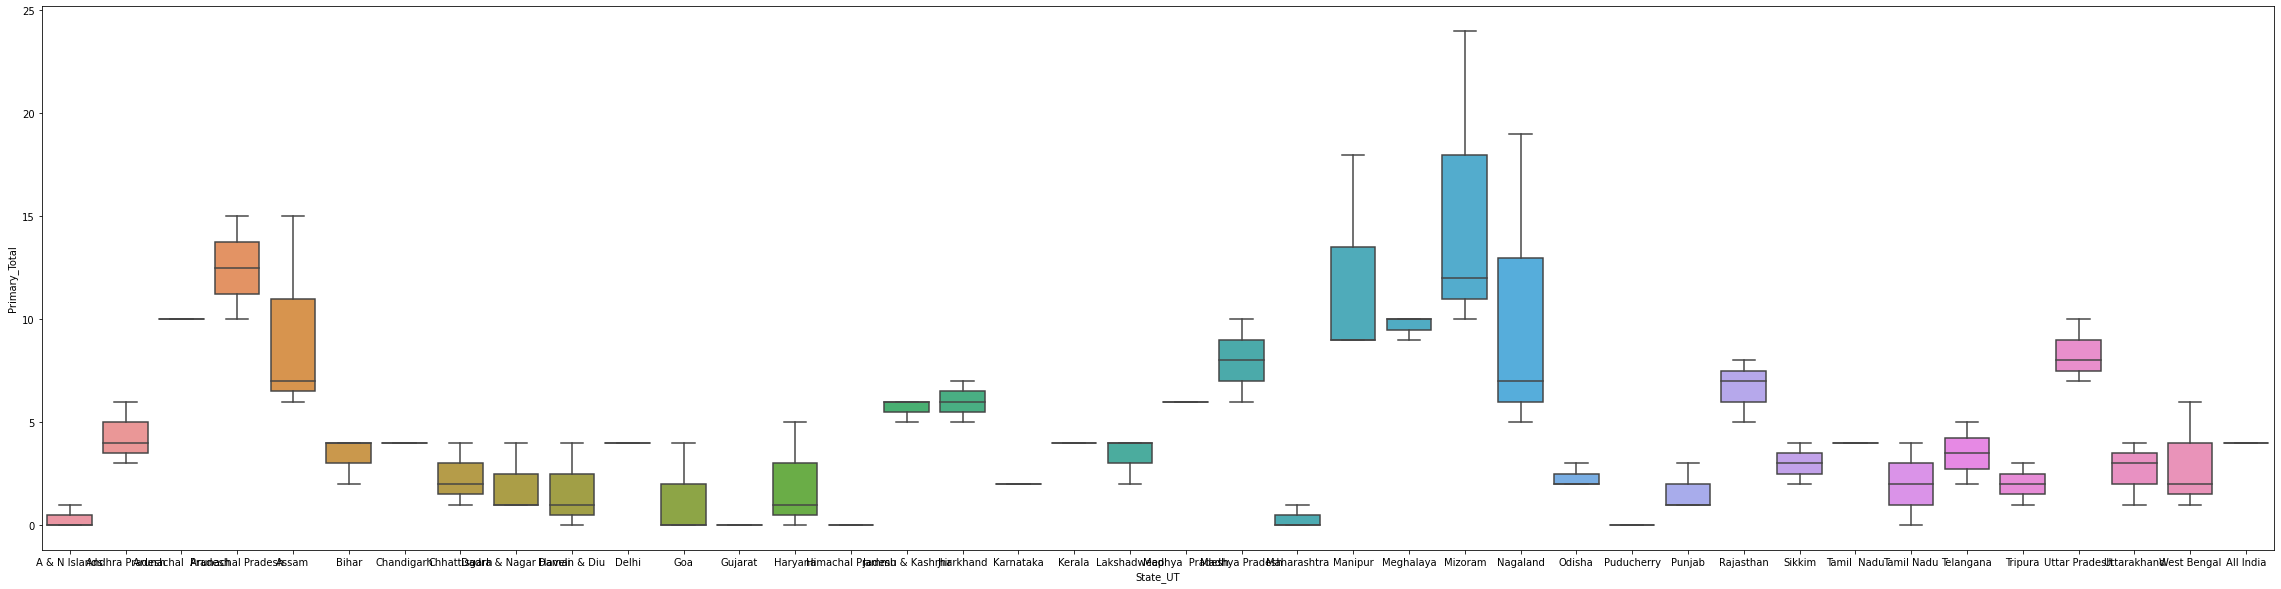

In [50]:
plt.figure(figsize=(40,10))
sns.boxplot(x='State_UT',y='Primary_Total',data=df)
# Primary total is highest for Mizoram state, the median is the highest.

<AxesSubplot:xlabel='State_UT', ylabel='Secondary _Total'>

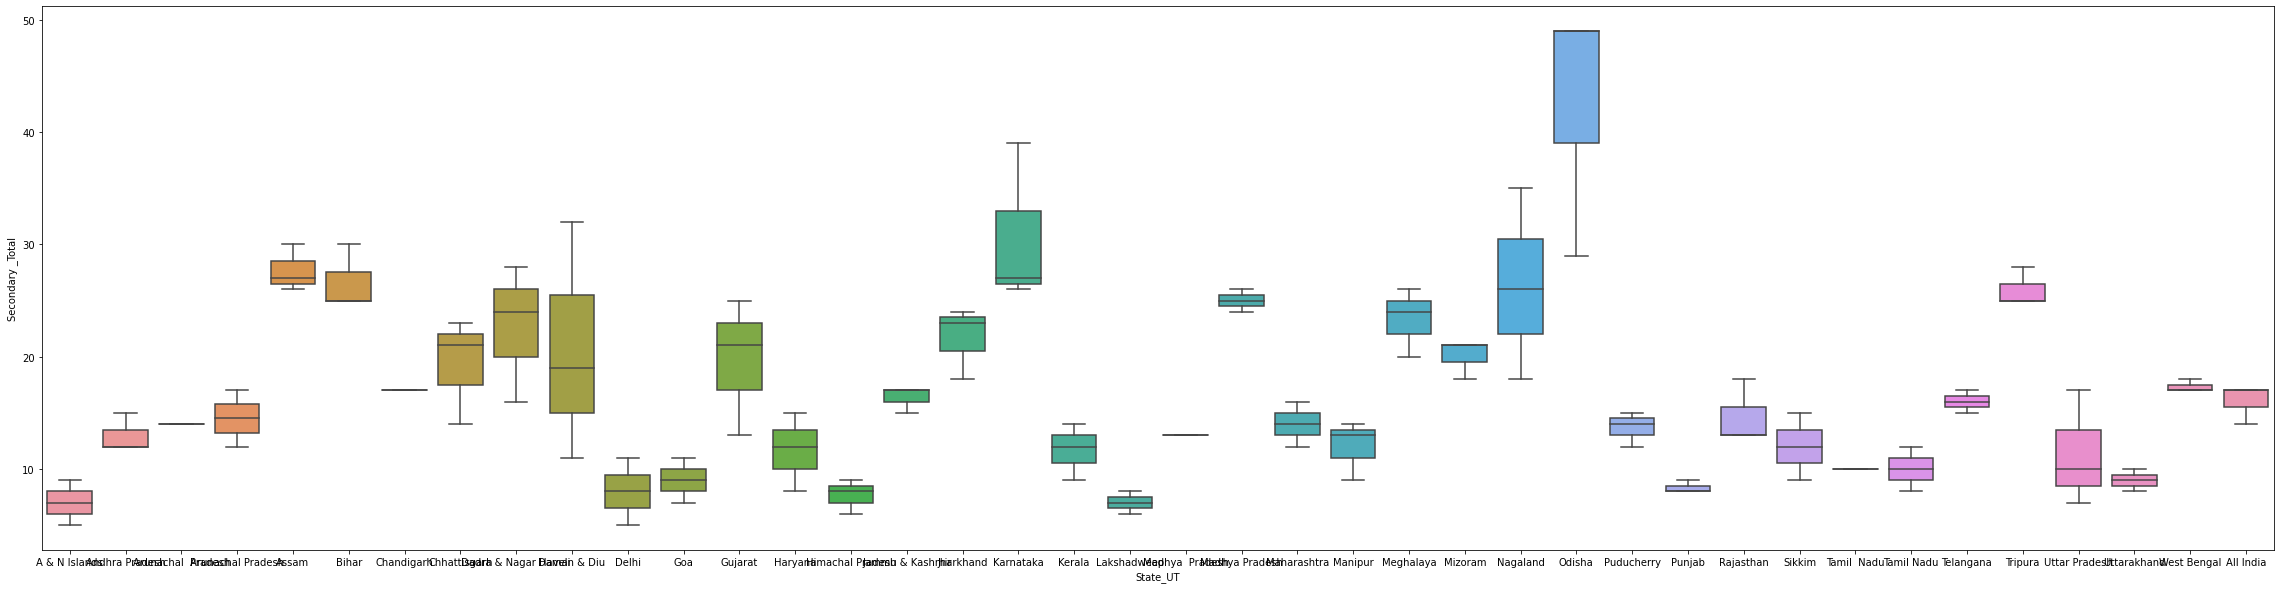

In [51]:
plt.figure(figsize=(40,10))
sns.boxplot(x='State_UT',y='Secondary _Total',data=df)
# Secondary total is highest for Odisha state, the median is the highest.

<AxesSubplot:xlabel='year', ylabel='HrSecondary_Total'>

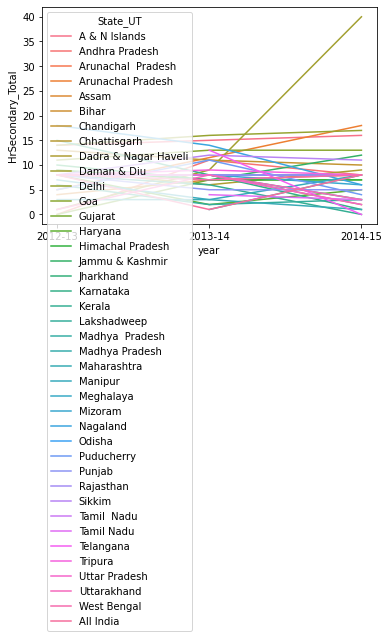

In [52]:
sns.lineplot(x='year',y='HrSecondary_Total', estimator=np.mean, hue='State_UT', data=df)
# In 2014-15 huge increase in dropout ratio in Dadea & Nagar Haveli.

<AxesSubplot:xlabel='year', ylabel='Secondary _Total'>

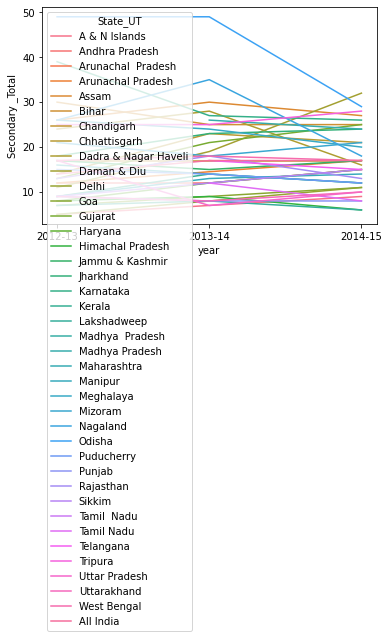

In [53]:
sns.lineplot(x='year',y='Secondary _Total', estimator=np.mean, hue='State_UT', data=df)
#In initial years highest drop out ratio in Odisha state.

In [54]:
ax=pd.crosstab(df.State_UT,df.year)

In [55]:
ax

year,2012-13,2013-14,2014-15
State_UT,,,
A & N Islands,1,1,1
All India,1,1,1
Andhra Pradesh,1,1,1
Arunachal Pradesh,0,1,0
Arunachal Pradesh,1,0,1
Assam,1,1,1
Bihar,1,1,1
Chandigarh,1,1,1
Chhattisgarh,1,1,1


<AxesSubplot:xlabel='year', ylabel='State_UT'>

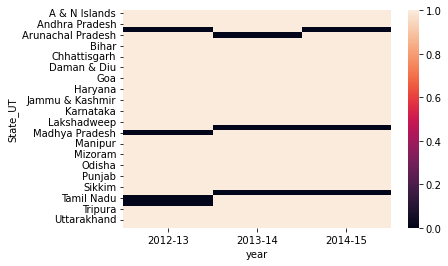

In [56]:
sns.heatmap(ax)
#Higher drop out ratio in Tripura in 2013-14 and 2014-15 which was lower in 2012-13.

<AxesSubplot:xlabel='year', ylabel='HrSecondary_Total'>

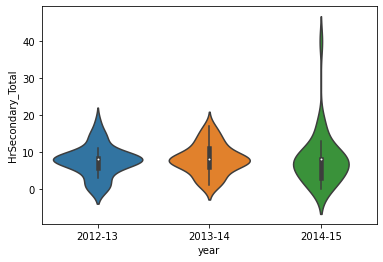

In [57]:
sns.set_context()
sns.violinplot(x='year',y='HrSecondary_Total',data=df)

<AxesSubplot:xlabel='year', ylabel='HrSecondary_Total'>

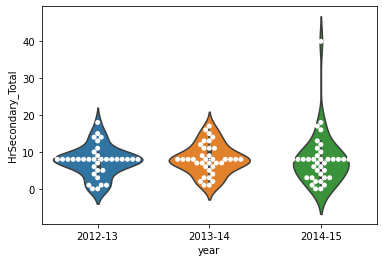

In [58]:
sns.violinplot(x='year',y='HrSecondary_Total',data=df)
sns.swarmplot(x='year',y='HrSecondary_Total',data=df,color='w')

In [59]:
dp_hm=df.copy() 
dp_hm.drop(['year','Primary_Total','Upper Primary_Total','Secondary _Total','HrSecondary_Total'],axis=1,inplace=True)
dp_hm.drop(index=dp_hm[dp_hm['State_UT']=='AllIndia'].index,inplace=True)

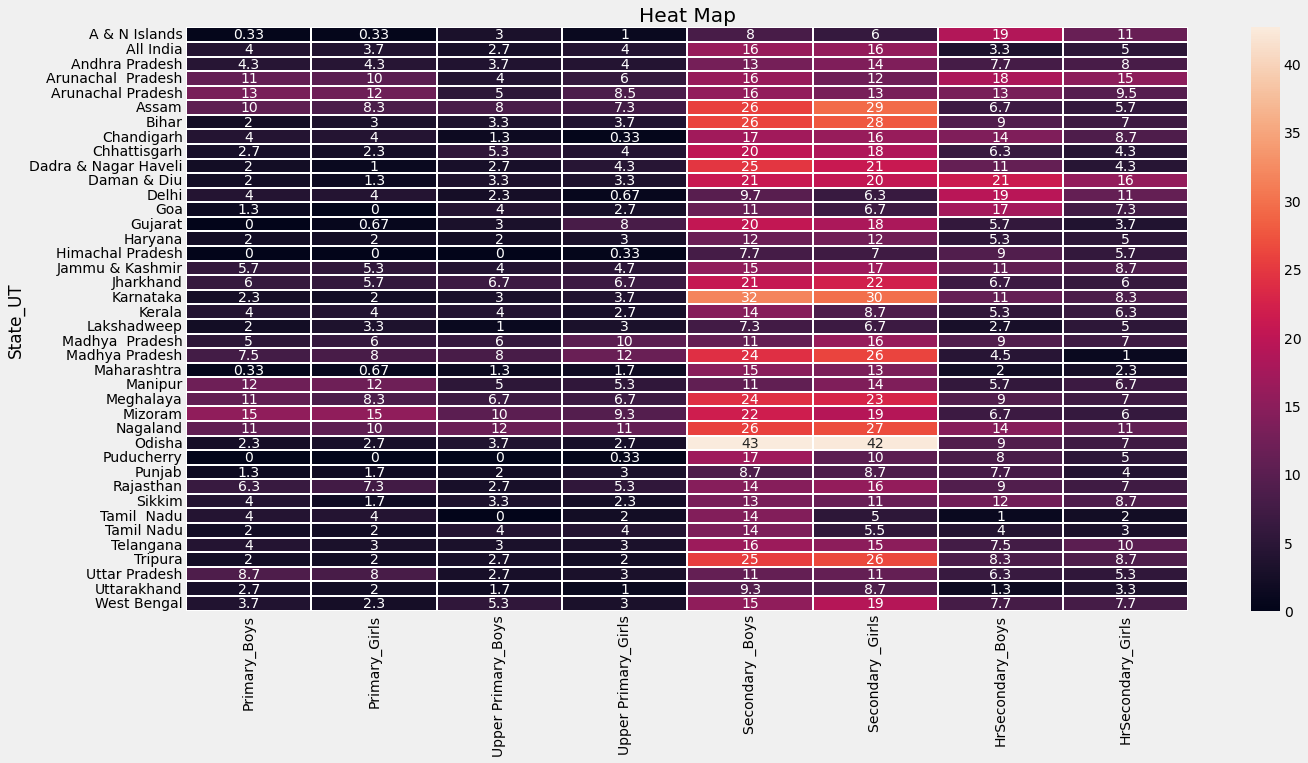

In [60]:
dp_hm=dp_hm.groupby('State_UT').mean()
plt.style.use('fivethirtyeight')

ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(dp_hm,linewidths=0.02,annot=True)
plt.title('Heat Map')
plt.show()
